<a href="https://colab.research.google.com/github/5100-chap/TC3006c.101_EQ6/blob/Canary/Reto_Kaggle_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import numpy as np
from pandas import DataFrame
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
#Conversion de CSV a DataFrame
train= pd.read_csv(r"train.csv")
test= pd.read_csv(r"test.csv")
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
#Analisis de la Estadistica Descrpitiva de los datos
print(train.describe())
print(test.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
       PassengerId      Pclass         Age       SibSp       Parch        Fare
co

In [6]:
#Comando para ver el tipo de dato de cada columna en el dataframe y cantidad de valores no nulos
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [8]:
#Transformacion Binaria a la columna Sexo
from sklearn import preprocessing
label = preprocessing.LabelEncoder()

train['Sex']= label.fit_transform(train['Sex'])
test['Sex']= label.fit_transform(test['Sex'])
print(train['Sex'].unique())
print(test['Sex'].unique())
#1 male
#0 female

[1 0]
[1 0]


In [9]:
#Contamos la cantidad de valores que hay en al columna Embarked
train.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [10]:
test.Embarked.value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [11]:
#Eliminamos la columna Embarked para dividirla en tres columnas con valores dummies para mejor organizacion y orden
train = pd.get_dummies(data=train, columns=['Embarked'])
test = pd.get_dummies(data=test, columns=['Embarked'])
train.drop('Embarked_Q', axis = 1,inplace = True)
test.drop('Embarked_Q', axis = 1,inplace = True)

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,True,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,False,True


In [13]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,False,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,False,True
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,False,False
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,False,True


<Axes: >

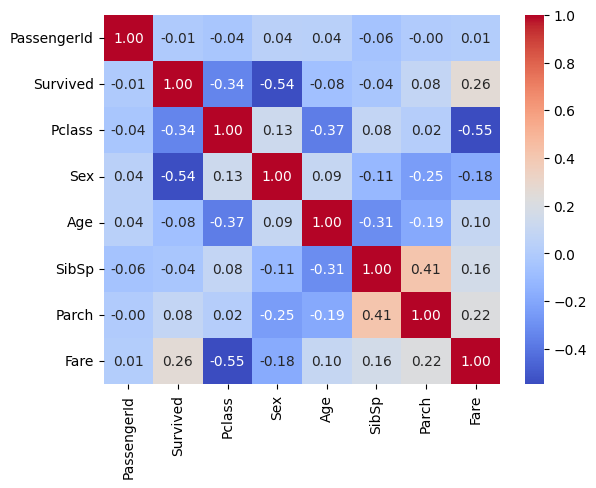

In [14]:
# Filtrar solo las columnas numéricas
numeric_cols = train.select_dtypes(include=[np.number])

# Calcular la correlación y visualizarla
sns.heatmap(numeric_cols.corr(), annot=True, fmt='.2f', cmap='coolwarm')

# **Limpieza de Datos: Train.csv**

In [15]:
#Contamos los datos no nulos
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked_C     891
Embarked_S     891
dtype: int64

In [16]:
#Contamos los datos nulos de todas las columnas
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked_C       0
Embarked_S       0
dtype: int64

In [17]:
#Filtramos la columna Name para que de solo los datos con nombre Master para que den solo los Niños(Non Null and Null) y la guardamos en train_Kid
train_Kid = train[train['Name'].str.contains('Master.') == True]
#Sustituimos los valores nulos de train_Kid con la media de los datos de los niños
train_Kid["Age"].fillna(train_Kid["Age"].mean(),inplace=True)
#Filtramos la columna Name para que de solo los datos con nombre Mr para que den solo los Adultos(Non Null and Null) y la guardamos en train_Men
train_Men = train[(train['Name'].str.contains('Mr') == True)&(train['Name'].str.contains('Mrs.') == False)]
#Sustituimos los valores nulos de train_Men con la media de los datos de los hombres
train_Men["Age"].fillna(train_Men["Age"].mean(),inplace=True)
#Filtramos la columna Name para que de solo los datos con nombre Miss and Mr  para que den solo los Mujeres(Non Null and Null) y la guardamos en train_Women
train_Women = train[train['Name'].str.contains('Miss.|Mrs.') == True]
#Sustituimos los valores nulos de train_Women con la media de los datos de las mujeres
train_Women["Age"].fillna(train_Women["Age"].mean(),inplace=True)
#Filtramos la columna Name para que de solo los datos faltantes que no sean los anteriores dandonos Doctores y otros sin llamarse Mr Mss Master and Miss y guardamos esos datos faltante en train_Other
train_Other = train[train['Name'].str.contains('Miss.|Mrs.|Master.|Mr.') == False]
#Sustituimos los valores nulos de train_Other con la media de los datos de los restantes
train_Other["Age"].fillna(train_Other["Age"].mean(),inplace=True)

C:\Users\ljmvc\AppData\Local\Temp\ipykernel_19924\102126211.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_Kid["Age"].fillna(train_Kid["Age"].mean(),inplace=True)
C:\Users\ljmvc\AppData\Local\Temp\ipykernel_19924\102126211.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_Men["Age"].fillna(train_Men["Age"].mean(),inplace=True)
C:\Users\ljmvc\AppData\Local\Temp\ipykernel_19924\102126211.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [18]:
#Comprobamos que los datos esten completo al original y vemos que estan completos
print(train_Kid.shape)
print(train_Men.shape)
print(train_Women.shape)
print(train_Other.shape)

(40, 13)
(518, 13)
(309, 13)
(24, 13)


In [19]:
#Juntamos todos  los datos limpios guardados en las anteriores variables para formar la tabla original sin valores nulos
df_train = pd.concat([train_Kid,train_Men,train_Women,train_Other])
#Eliminamos la columna Cabin por tener el 70% datos nulos
df_train = df_train.drop("Cabin",axis=1)

In [20]:
#Comprobamos que no hay valores nulos
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked_C     0
Embarked_S     0
dtype: int64

In [21]:
#Comprobamos que no tenga ningun valor duplicado
df_train.duplicated().sum()

0

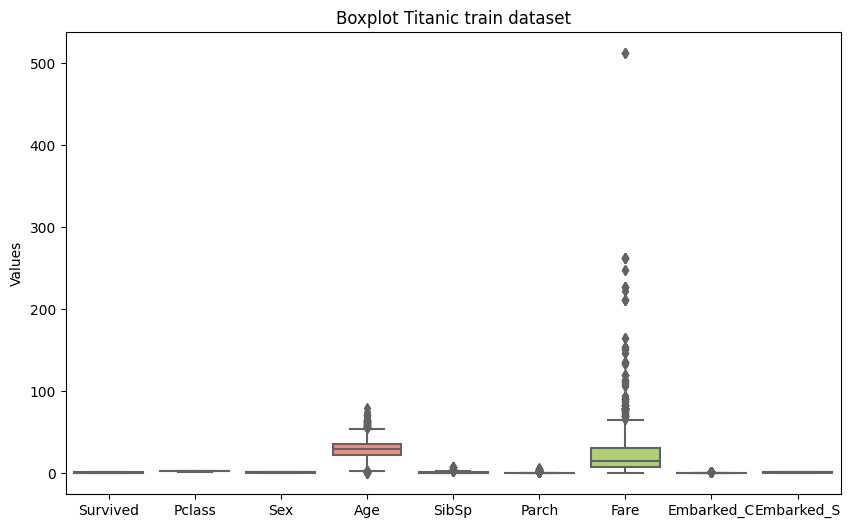

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a boxplot using Seaborn
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
sns.boxplot(data=df_train.drop('PassengerId', axis=1), palette="Set3")

# Optional: Add titles and labels
plt.title("Boxplot Titanic train dataset")
plt.ylabel("Values")

# Show the plot
plt.show()

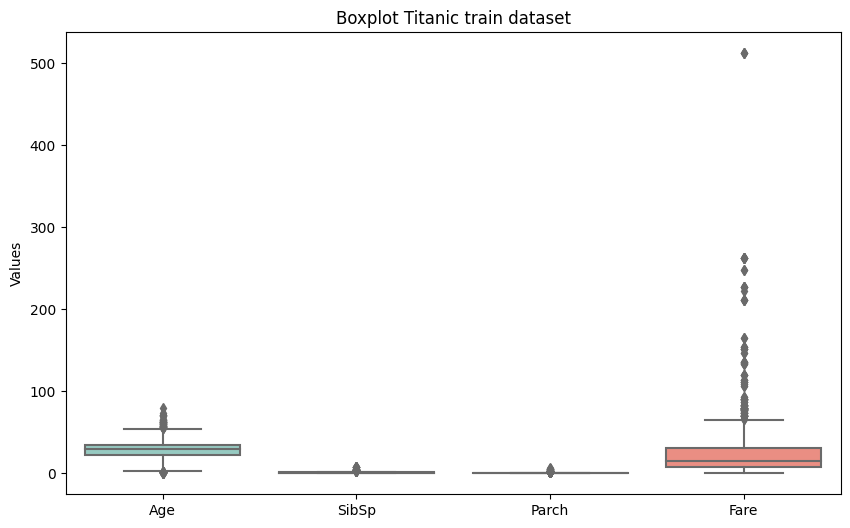

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a boxplot using Seaborn
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
sns.boxplot(data=df_train.drop(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Embarked_C', 'Embarked_S'], axis=1), palette="Set3")

# Optional: Add titles and labels
plt.title("Boxplot Titanic train dataset")
plt.ylabel("Values")

# Show the plot
plt.show()

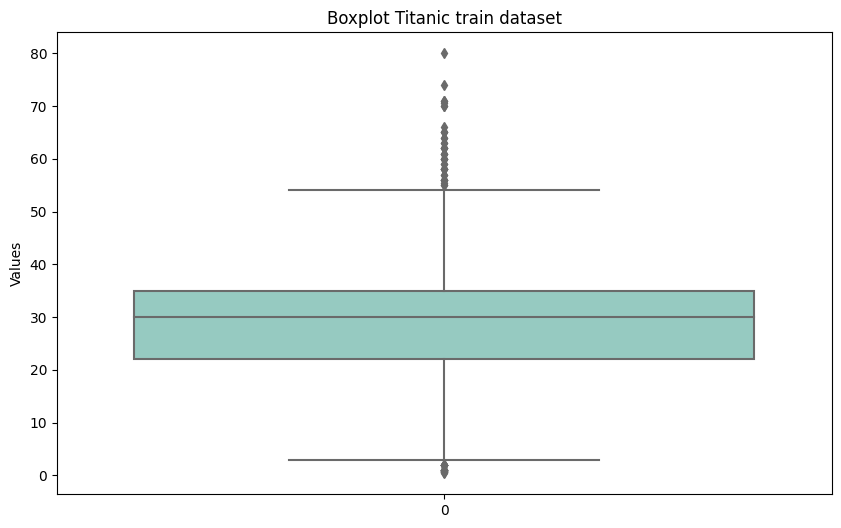

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a boxplot using Seaborn
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
sns.boxplot(data=df_train.Age, palette="Set3")

# Optional: Add titles and labels
plt.title("Boxplot Titanic train dataset")
plt.ylabel("Values")

# Show the plot
plt.show()

In [25]:
df_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.852526,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.162140,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


# Limpieza de Datos: Test.csv

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int32  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked_C   418 non-null    bool   
 11  Embarked_S   418 non-null    bool   
dtypes: bool(2), float64(2), int32(1), int64(4), object(3)
memory usage: 32.0+ KB


In [27]:
test.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked_C     418
Embarked_S     418
dtype: int64

In [28]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked_C       0
Embarked_S       0
dtype: int64

In [29]:
#Filtramos la columna Name para que de solo los datos con nombre Master para que den solo los Niños(Non Null and Null) y la guardamos en test_Kid
test_Kid = test[test['Name'].str.contains('Master.') == True]
#Sustituimos los valores nulos de test_Kid con la media de los datos de los niños
test_Kid["Age"].fillna(test_Kid["Age"].mean(),inplace=True)
#Filtramos la columna Name para que de solo los datos con nombre Mr para que den solo los Adultos(Non Null and Null) y la guardamos en test_Men
test_Men = test[(test['Name'].str.contains('Mr') == True)&(test['Name'].str.contains('Mrs.') == False)]
#Sustituimos los valores nulos de test_Men con la media de los datos de los hombres
test_Men["Age"].fillna(test_Men["Age"].mean(),inplace=True)
#Filtramos la columna Name para que de solo los datos con nombre Miss and Mr  para que den solo los Mujeres(Non Null and Null) y la guardamos en test_Women
test_Women = test[test['Name'].str.contains('Miss.|Mrs.') == True]
#Sustituimos los valores nulos de test_Women con la media de los datos de las mujeres
test_Women["Age"].fillna(test_Women["Age"].mean(),inplace=True)
#Filtramos la columna Name para que de solo los datos faltantes que no sean los anteriores dandonos Doctores y otros sin llamarse Mr Mss Master and Miss y guardamos esos datos faltante en test_Other
test_Other = test[test['Name'].str.contains('Miss.|Mrs.|Master.|Mr.') == False]
#Sustituimos los valores nulos de test_Other con la media de los datos de los restantes
test_Other["Age"].fillna(test_Other["Age"].mean(),inplace=True)

C:\Users\ljmvc\AppData\Local\Temp\ipykernel_19924\1814115894.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_Kid["Age"].fillna(test_Kid["Age"].mean(),inplace=True)
C:\Users\ljmvc\AppData\Local\Temp\ipykernel_19924\1814115894.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_Men["Age"].fillna(test_Men["Age"].mean(),inplace=True)
C:\Users\ljmvc\AppData\Local\Temp\ipykernel_19924\1814115894.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [30]:
#Juntamos todos  los datos limpios guardados en las anteriores variables para formar la tabla original sin valores nulos
df_test = pd.concat([test_Kid,test_Men,test_Women,test_Other])
#Sustituimos los valores nulos de la columna Fare por la media general ya que solo es un valor NaN
df_test["Fare"].fillna(df_test["Fare"].median(),inplace=True)
#Eliminamos la columna Cabin por tener el 70% datos nulos en train
df_test = df_test.drop("Cabin",axis=1)

In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int32  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked_C   418 non-null    bool   
 11  Embarked_S   418 non-null    bool   
dtypes: bool(2), float64(2), int32(1), int64(4), object(3)
memory usage: 32.0+ KB


In [32]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 21 to 414
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int32  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked_C   418 non-null    bool   
 10  Embarked_S   418 non-null    bool   
dtypes: bool(2), float64(2), int32(1), int64(4), object(2)
memory usage: 31.8+ KB


In [33]:
#Comprobamos que no hay valores nulos
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked_C     0
Embarked_S     0
dtype: int64

In [34]:
#Comprobamos que no tenga ningun valor duplicado
df_test.duplicated().sum()

0

In [36]:
from pathlib import Path  
filepath = Path('../Desarrollo_de_modelo/train_clean.csv') 
df_train.to_csv(filepath, index=False)

In [37]:
from pathlib import Path  
filepath = Path('../Desarrollo_de_modelo/test_clean.csv') 
df_test.to_csv(filepath, index=False)